Karolina Tatarczyk

#### A program that will tell you what is the most optimal number of pencils to reproduce the image 'pencils.jpg'.

In [ ]:
pip install --user plotnine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score
from plotnine import *

import pandas as pd

(427, 640, 3)

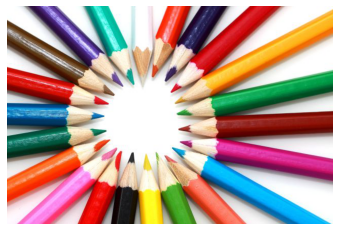

In [3]:
pencils = plt.imread('pencils.jpg', format='jpeg')
plt.imshow(pencils)
plt.axis('off')
pencils.shape

In [4]:
pencils_flat = pencils.reshape(-1, 3)
pencils_flat.shape


(273280, 3)

### Calculate Inertia Measure

In [14]:
maxK = 40
ks = range(10, maxK)
inercje = []

for k in ks:
    km = KMeans(n_clusters=k).fit(pencils_flat)
    inercje.append(km.inertia_)

inercje_df = pd.DataFrame({'K' : ks, 'Inercja' : inercje})

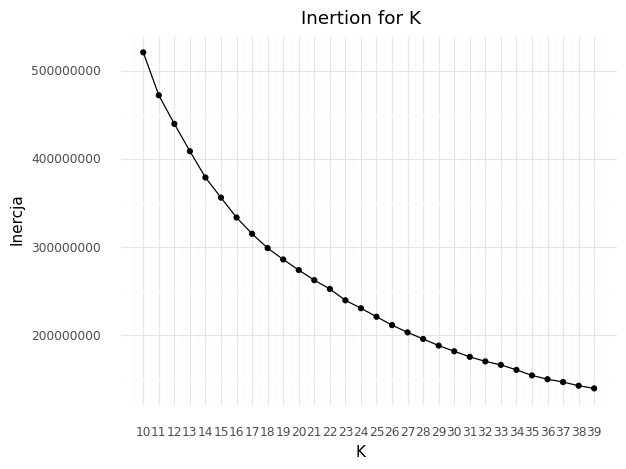

<ggplot: (8767049288445)>

In [21]:
(ggplot(inercje_df, aes( x = 'K', y = 'Inercja'))
+ geom_point()
+ geom_line()
+ scale_x_continuous(breaks = ks)
+ theme_minimal()
+ labs(title = "Inertion for K"))


In [19]:
diff = [0]
diffPr = [0]
for i in range(0,maxK-11):
    diff.append(inercje_df.iloc[i,1] - inercje_df.iloc[i+1, 1])
    diffPr.append((inercje_df.iloc[i,1] - inercje_df.iloc[i+1,1])*100/inercje_df.iloc[i,1])
inercje_df = inercje_df.assign(zysk = diff)
inercje_df = inercje_df.assign(zysk_proc = diffPr)
inercje_df

,K,Inercja,zysk,zysk_proc
0,10,5.211318e+08,0.000000e+00,0.000000
1,11,4.724322e+08,4.869968e+07,9.344982
2,12,4.399762e+08,3.245594e+07,6.869969
3,13,4.089519e+08,3.102434e+07,7.051367
4,14,3.790921e+08,2.985983e+07,7.301550
5,15,3.562437e+08,2.284831e+07,6.027115
6,16,3.336891e+08,2.255465e+07,6.331241
7,17,3.151937e+08,1.849541e+07,5.542707
8,18,2.989928e+08,1.620090e+07,5.139981
9,19,2.860787e+08,1.291405e+07,4.319185


In [22]:
#nBest = inercje_df[inercje_df['zysk_proc'] > 20].K.iloc[-1]
print("Optymalna liczba kredek: 23")

Optymalna liczba kredek: 23


In [23]:
km = KMeans(n_clusters=23, random_state=0).fit(pencils_flat)

(-0.5, 639.5, 426.5, -0.5)

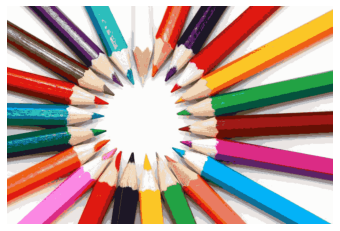

In [24]:
redrawn_pencils = pencils_flat.copy()

for i in np.unique(km.labels_):
    redrawn_pencils[km.labels_ == i, :] = km.cluster_centers_[i]

redrawn_pencils = redrawn_pencils.reshape(pencils.shape)

plt.imshow(redrawn_pencils)
plt.axis('off')

### Silhouette Index

In [26]:
df =pd.DataFrame(pencils_flat, columns = ['v1', 'v2', 'v3'])

In [27]:
import timeit

In [29]:
n_clusters = range(10, 23)
silhouettes = []

for n in n_clusters:
    start = timeit.default_timer()
    km = KMeans(n_clusters=n).fit(df)
   
    silhouettes.append(silhouette_score(df, km.predict(df) ))
    stop = timeit.default_timer()
    print("Ilość klastrów =", n, 'Time: ', stop - start)

Ilość klastrów = 10 Time:  850.5059188559999
Ilość klastrów = 11 Time:  844.663601272
Ilość klastrów = 12 Time:  843.6189543299997
Ilość klastrów = 13 Time:  846.6995623699995
Ilość klastrów = 14 Time:  851.2531336720003
Ilość klastrów = 15 Time:  841.1853139979994
Ilość klastrów = 16 Time:  840.0888169210011
Ilość klastrów = 17 Time:  841.9753228589998
Ilość klastrów = 18 Time:  853.5789209970008
Ilość klastrów = 19 Time:  848.3598914840004
Ilość klastrów = 20 Time:  851.6617128729995
Ilość klastrów = 21 Time:  859.6215713370002
Ilość klastrów = 22 Time:  845.3729803869992


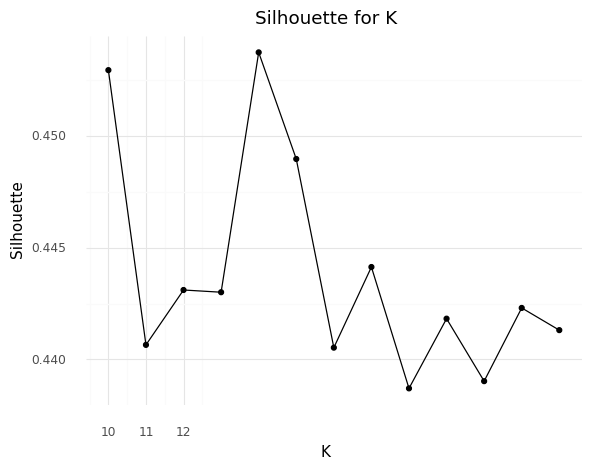

<ggplot: (8767049242013)>

In [32]:
ks = range(0,13)

inercje_df = pd.DataFrame({'K' : n_clusters, 'Silhouette' : silhouettes})

(ggplot(inercje_df, aes( x = 'K', y = 'Silhouette'))
+ geom_point()
+ geom_line()
+ scale_x_continuous(breaks = ks)
+ theme_minimal()
+ labs(title = "Silhouette for K"))

Z wykresu wynika, że optymalna liczba kredek to: 14

(-0.5, 639.5, 426.5, -0.5)

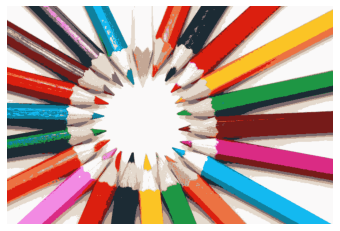

In [33]:
km = KMeans(n_clusters=14, random_state=0).fit(pencils_flat)
redrawn_pencils = pencils_flat.copy()

for i in np.unique(km.labels_):
    redrawn_pencils[km.labels_ == i, :] = km.cluster_centers_[i]

redrawn_pencils = redrawn_pencils.reshape(pencils.shape)

plt.imshow(redrawn_pencils)
plt.axis('off')